In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv(r"Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [56]:
feature = df.drop("Purchased", axis = "columns")
feature.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000


In [57]:
target = df["Purchased"]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [58]:
import seaborn as s

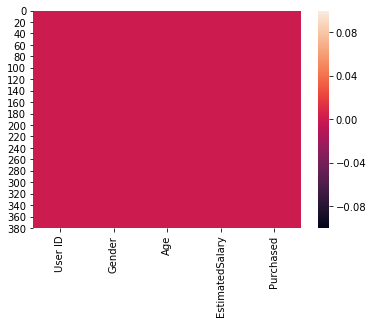

In [59]:
s.heatmap(df.isnull())

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le_Gender = LabelEncoder()

In [62]:
Gender_dum = pd.get_dummies(df["Gender"], prefix = "Gender")
Gender_dum.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [63]:
feature = pd.concat([df, Gender_dum], axis = "columns")
feature.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [64]:
feature = feature.drop(["Gender", "User ID"], axis = "columns")
feature.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [65]:
from sklearn import tree

In [66]:
model = tree.DecisionTreeClassifier()

In [67]:
model.fit(feature, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
model.score(feature, target)

1.0

In [69]:
model.predict([[30,80000,1,1,0]])

array([1])

In [70]:
model.predict([[30,80000,0,0,1]])

array([0])

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [72]:
X = feature
X.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,)

In [83]:
model = SVC()

In [84]:
model.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [85]:
model.score(X_train, y_train)

0.98125

In [87]:
y_predict = model.predict([[32,38500,1,0,1]])
y_predict

array([0])